## Notebook to make a comparison between two regression methods

The regression between atmospheric variables and sea level for the cmip6 data has been performed in two different ways.

With the trend included as a forcing parameter in the regression

With the time series detrended before the regression

Here, both results are compared

In [62]:
%load_ext autoreload
%autoreload 2

import sys
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

lowess = sm.nonparametric.lowess
sys.path.append('/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Github/Thesis-KNMI/Projections/code')

import import_data as imprt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Import data

In [63]:
# Open data file
wind_contr_hist_np = imprt.import_cmip6_wind_contribution_data()
wind_contr_hist_tim = imprt.import_cmip6_wind_contribution_data(wind_model = 'Timmerman')
wind_contr_hist_da = imprt.import_cmip6_wind_contribution_data(wind_model = 'Dangendorf')


# Create dataframe
wind_contr_hist_np = wind_contr_hist_np.wind_total.to_pandas().T
wind_contr_hist_tim = wind_contr_hist_tim.wind_total.to_pandas().T
wind_contr_hist_da = wind_contr_hist_da.wind_total.to_pandas().T

# Import regression coefficients and coefficients of determination
results_np = imprt.import_cmip6_regression_results()
results_tim = imprt.import_cmip6_regression_results(wind_model = 'Timmerman')
results_da = imprt.import_cmip6_regression_results(wind_model = 'Dangendorf')
    

In [64]:
# Import historical wind contribution from pre_projection_regression
wind_contr_hist_pp_np = imprt.import_cmip6_wind_contribution_data_preproj()
wind_contr_hist_pp_tim = imprt.import_cmip6_wind_contribution_data_preproj(wind_model = 'Timmerman')
wind_contr_hist_pp_da = imprt.import_cmip6_wind_contribution_data_preproj(wind_model = 'Dangendorf')


# Import regression coefficients and coefficients of determination
path_reg_results = '/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Data/cmip6/Regression results/Projections/'
results_pp_np = pd.read_csv(path_reg_results + f'NearestPoint_results.csv', index_col = 'result')
results_pp_tim = pd.read_csv(path_reg_results + f'Timmerman_results.csv', index_col = 'result')
results_pp_da = pd.read_csv(path_reg_results + f'Dangendorf_results.csv', index_col = 'result')



In [82]:
# Open data file
zos = imprt.import_cmip6_slh_data()

In [84]:
zos.zos.sel(model = 'ACCESS-CM2', drop=True).values

array([-3.42589645,  0.01690129,  0.21425542, -0.2048845 ,  0.52450267,
        2.38417742, -2.12472707, -6.21664799, -1.79363002, -1.82951562,
       -9.5060626 , -8.74691737, -0.82210958, -3.14631996,  3.48528719,
        6.62745308,  0.30444508,  7.23211234,  5.16456947,  4.0754056 ,
        1.6380625 , -3.00366255, -0.57479001, -2.6739577 ,  2.04940265,
       -0.96937022, -1.08493819, -9.04315689, -6.2685011 , -0.87820622,
       -2.58655117, -4.92256056, -2.75711023, -0.55875943,  1.82258225,
        7.56782046,  0.41165323, -2.32874051, -5.98252846,  0.95948181,
       -4.86983572,  0.18579766, -1.63907288,  1.05995067, -8.38308219,
        1.73575553, -1.52793425,  4.77842461,  3.63319267, -0.33965819,
       -5.9934306 , -0.27260327,  2.2959669 ,  2.26457354,  7.53063583,
        4.24647897,  6.6686255 , -0.2096142 ,  1.92204005, -2.76466714,
       -2.58398428, -5.7188387 , -0.67344067,  3.12696795, -5.51173926,
       -4.25916855, -1.72409837, -2.08298515, -3.31522583,  0.59

In [81]:
def R2_var(df, y, var, regression_):
    """
    For var choose 
    for model = 'NearestPoint' ['wind total', 'u$^2$', 'v$^2$']
    for model = 'Timmerman'    ['wind total', 'u$^2$ total', 'v$^2$ total']
    for model = 'Dangndorf'    ['wind total', 'Negative corr region', 'Positive corr region']
    """
    
    x_wind = pd.DataFrame(data={'time': df.index.values, 
                                var : df[var].values})
    x_wind = x_wind.set_index('time')
    x_wind = x_wind[x_wind.index.isin(y.index)]
    
    fit = regression_.fit(x_wind, y)
    score = regression_.score(x_wind,y)
    
    return score

In [102]:
import pandas as pd

df1 = pd.DataFrame(data = {'time':wind_contr_hist_np.index.values, 'x':wind_contr_hist_np['ACCESS-CM2'].values})
df1 = df1.set_index('time')

df2 = pd.DataFrame(data = {'time':wind_contr_hist_pp_np.index.values, 'x':wind_contr_hist_pp_np['ACCESS-CM2'].values})
df2 = df2.set_index('time')

dfy = pd.DataFrame(data = {'time':wind_contr_hist_np.index.values,
                   'y':zos.zos.sel(model = 'ACCESS-CM2', drop=True).values})
dfy = dfy.set_index('time')

In [105]:
from sklearn.linear_model import LinearRegression as linr

# Define regression
regression_ = linr()
    
fit1 = regression_.fit(df1, dfy)
fit2 = regression_.fit(df2, dfy)

R1 = regression_.score(df1, dfy)
R2 = regression_.score(df2, dfy)

In [106]:
R1, R2

(0.25371802151123823, 0.2537180215112381)

In [97]:
df2

,x,y
time,,
1850,0.461084,-3.425896
1851,2.127769,0.016901
1852,3.428783,0.214255
1853,-0.359886,-0.204885
1854,1.500166,0.524503
...,...,...
2010,-0.741294,10.271232
2011,-1.065424,7.974182
2012,0.882871,3.777886


In [79]:
results_np

model,ACCESS-CM2,ACCESS-ESM1-5,CAMS-CSM1-0,CMCC-CM2-SR5,CNRM-CM6-1,CanESM5,CanESM5-CanOE,EC-Earth3-Veg-LR,GFDL-CM4,GFDL-ESM4,MPI-ESM1-2-HR,MRI-ESM2-0,NESM3,NorCPM1
r2,0.392258,0.200593,0.142345,0.295193,0.547119,0.605239,0.494752,0.656123,0.476659,0.559512,0.493667,0.424209,0.479294,0.506998
r2_wind,0.293669,0.191183,0.138529,0.261280,0.544110,0.186909,0.323130,0.532339,0.463677,0.313037,0.492758,0.314733,0.448562,0.457258
r2_u2,0.215973,0.120731,0.133412,0.229229,0.415269,0.190673,0.303964,0.476702,0.395524,0.237958,0.457630,0.297583,0.327884,0.454700
r2_v2,0.014834,0.023847,0.007806,0.061760,0.258232,0.060439,0.119651,0.183978,0.000879,0.014917,0.006573,0.102165,0.253757,0.072744
rmse,3.123602,3.903788,3.940232,2.555383,2.170244,2.243567,2.185491,1.986014,1.868769,2.625286,2.499018,1.912912,2.540924,1.494190
constant,0.931595,-1.103339,-0.748820,-0.658713,0.360872,4.670960,1.938664,-0.646227,-0.745705,3.486778,-3.606623,2.210215,1.818710,0.688784
u2,2.217378,1.860793,1.670584,1.496767,1.703923,1.610340,1.513967,1.994894,2.092565,2.091789,2.574871,1.411563,1.660374,1.493901
v2,-1.245161,-1.102817,-0.366240,0.466434,1.131348,0.423838,0.527715,0.969848,-0.682025,-0.880973,-0.701877,0.520079,1.344630,0.085760
trend,1.589211,-0.536992,-0.331424,-0.711517,0.224109,-2.937156,-1.607060,-1.502987,-0.370821,-2.481818,0.134944,-1.078618,-0.777515,-0.600050


### Comparison with all models

In [66]:
def plot_result(results1, results2, var1, var2, name, title, wind_model = 'NearestPoint', whichmodels = 'allmodels'):
    plt.figure(figsize=(0.42*results1.columns.size,4))

    for i, model in enumerate(results1.columns):
        if i == 0:
            plt.scatter(model, results1[model][var1], marker = 'x', color = 'tab:orange', label = 'Trend as forcing parameter')
            plt.scatter(model, results2[model][var2], marker = 'x', color = 'tab:blue', label = 'Forcing parameters detrended')
        else:
            plt.scatter(model, results1[model][var1], marker = 'x', color = 'tab:orange')
            plt.scatter(model, results2[model][var2], marker = 'x', color = 'tab:blue')
    plt.xticks(rotation=90) 
    plt.ylim(0,0.8)
    plt.grid()
    plt.legend(loc='upper left')
    plt.title(f'{title} - {wind_model}')
    plt.ylabel(f'{name} [-]')
    plt.tight_layout()

    plt.savefig(f'/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Figures/Regression trend comparison/{name}_{wind_model}_{whichmodels}')

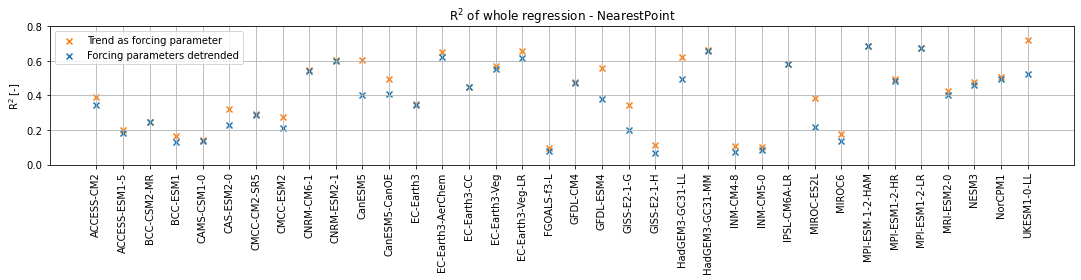

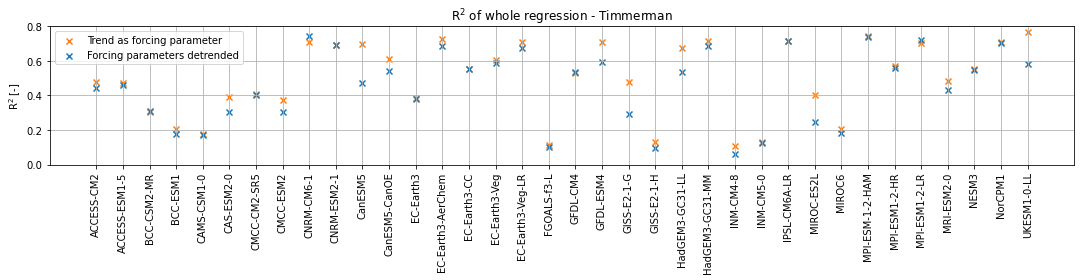

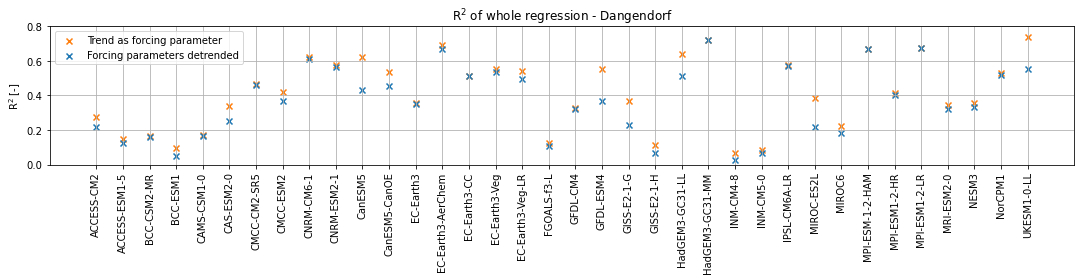

In [67]:
plot_result(results_np, results_pp_np, 'r2', 'R$^2$', 'R$^2$', 'R$^2$ of whole regression')
plot_result(results_tim, results_pp_tim, 'r2', 'R$^2$', 'R$^2$', 'R$^2$ of whole regression', wind_model = 'Timmerman')
plot_result(results_da, results_pp_da, 'r2', 'R$^2$', 'R$^2$', 'R$^2$ of whole regression', wind_model = 'Dangendorf')

Results are very similar for the three different multiple regression models and overall the regression performs better when the trend is a forcing parameter.

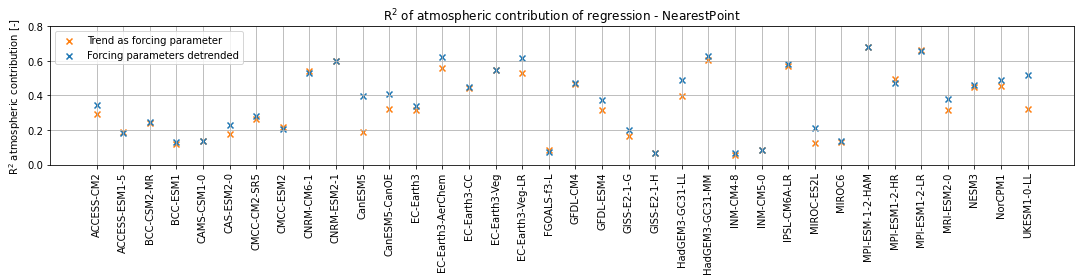

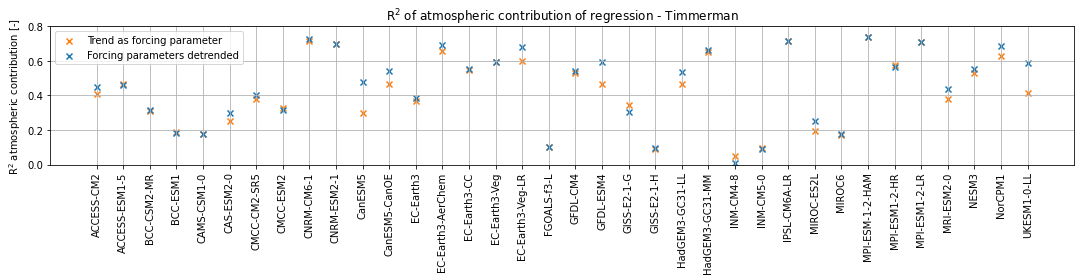

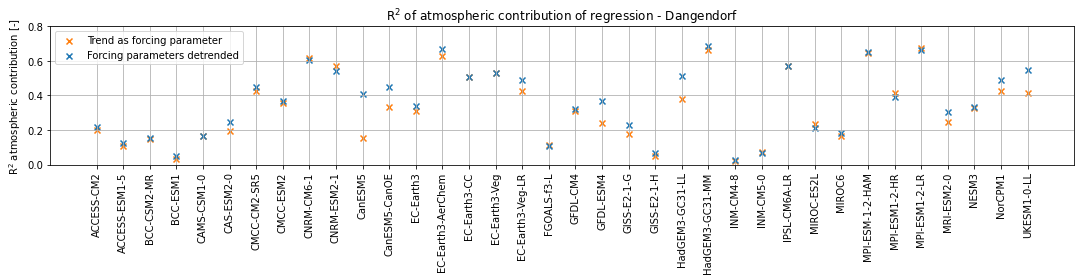

In [68]:
plot_result(results_np, results_pp_np, 'r2_wind', 'R$^2_{wind}$', 'R$^2$ atmospheric contribution', 'R$^2$ of atmospheric contribution of regression')
plot_result(results_tim, results_pp_tim, 'r2_wind', 'R$^2_{wind}$', 'R$^2$ atmospheric contribution', 'R$^2$ of atmospheric contribution of regression', wind_model = 'Timmerman')
plot_result(results_da, results_pp_da, 'r2_wind', 'R$^2_{wind}$', 'R$^2$ atmospheric contribution', 'R$^2$ of atmospheric contribution of regression', wind_model = 'Dangendorf')

Again, the three different multiple regression models perform alike. Now, the atmospheric contribution is overall highest when the forcing parameters are detrended and the trend is not a forcing parameter in the regression.

In [69]:
wind_contr = [wind_contr_hist_np, wind_contr_hist_tim, wind_contr_hist_da]
wind_contr_pp = [wind_contr_hist_pp_np, wind_contr_hist_pp_tim, wind_contr_hist_pp_da]
wind_labels = ['NearestPoint', 'Timmerman', 'Dangendorf']

def plot_time_series(wind_contrs1, wind_contrs2, whichmodels = 'allmodels'):
    window = 21
    
    models = wind_contrs1[0].columns
    
    n_col = 3
    n_row = models.size
    
    y_min = -4
    y_max = 5
    
    fig, axs = plt.subplots(n_row, n_col, figsize=(20, 3*n_row))
    
    
    for i in range(n_row):

        for j in range(n_col):
            
            ax = axs[i,j]
            
            frac = window/wind_contrs1[j][models[i]].values.size
            model_lowess = lowess(wind_contrs1[j][models[i]].values, wind_contrs1[j].index.values, frac, return_sorted=False)
            ax.plot(wind_contrs1[j].index.values, model_lowess, color = 'tab:orange', label = 'Trend as forcing parameter')
            
            frac = window/wind_contrs2[j][models[i]].values.size
            model_lowess = lowess(wind_contrs2[j][models[i]].values, wind_contrs2[j].index.values, frac, return_sorted=False)
            ax.plot(wind_contrs1[j].index.values, model_lowess, color = 'tab:blue', label = 'Forcing parameters detrended')
            
            ax.axhline(color='darkgray', linestyle='-', linewidth = 1)  
            ax.set_title(wind_labels[j] + '\n' + models[i])
            ax.set_ylim(y_min, y_max)
            if j == 2:
                ax.legend()
            
            if j == 0:
                ax.set_ylabel(f'atmospheric contribution to zos [cm]')
            if i == n_row - 1:
                ax.set_xlabel('time [y]')
                
    plt.tight_layout()
    plt.savefig(f'/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Figures/Regression trend comparison/all_smoothed_timeseries_{whichmodels}')

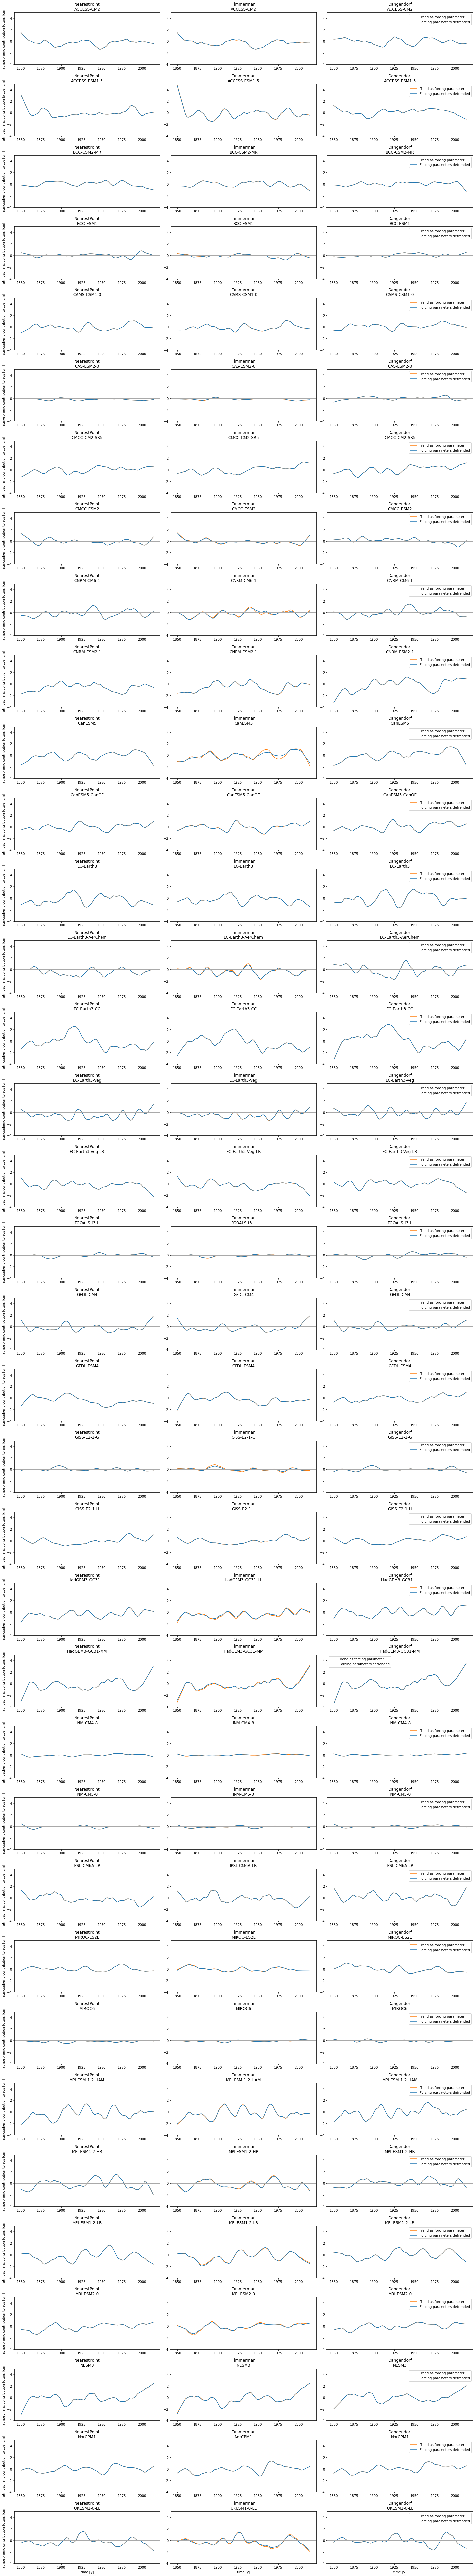

In [70]:
plot_time_series(wind_contr, wind_contr_pp)

Overall, the amplitude is larger if the forcing parameters are detrended and the trend is not a forcing parameter in the regression.

In [71]:
def plot_se(wind_contr1, wind_contr2, wind_model = 'NearestPoint', whichmodels = 'allmodels'):
    
    plt.figure(figsize=(0.42*wind_contr1.columns.size,4))
    
    for i, model in enumerate(wind_contr1.columns):
        if i == 0:
            plt.scatter(model, np.std(wind_contr1[model]), marker = 'x', color = 'tab:orange', label = 'Trend as forcing parameter')
            plt.scatter(model, np.std(wind_contr2[model]), marker = 'x', color = 'tab:blue', label = 'Forcing parameters detrended')
        else:
            plt.scatter(model, np.std(wind_contr1[model]), marker = 'x', color = 'tab:orange')
            plt.scatter(model, np.std(wind_contr2[model]), marker = 'x', color = 'tab:blue')
    plt.xticks(rotation=90) 
    plt.ylim(0,7)
    plt.grid()
    plt.legend(loc='upper left')
    plt.title(wind_model)
    plt.ylabel(f'Standard deviation [cm]')
    plt.tight_layout()

    plt.savefig(f'/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Figures/Regression trend comparison/stddev_{wind_model}_{whichmodels}')

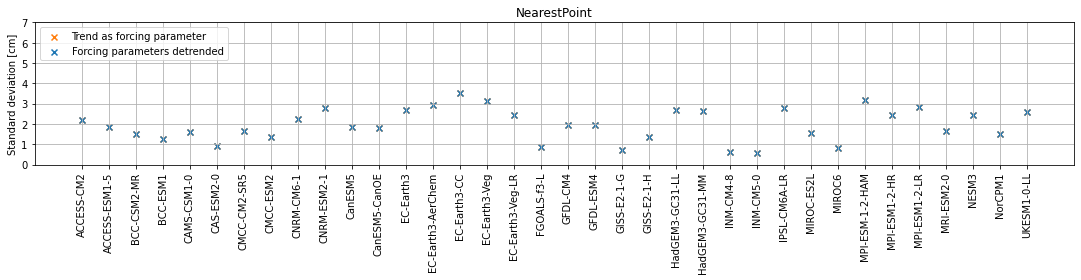

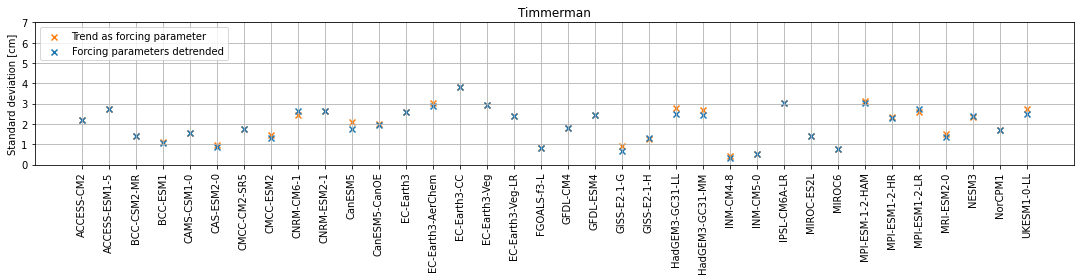

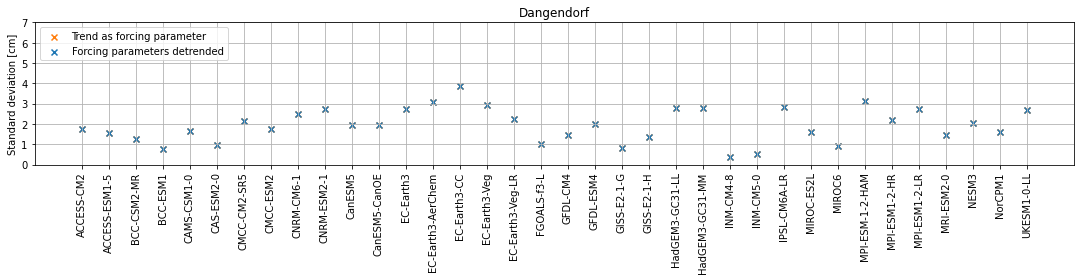

In [72]:
plot_se(wind_contr_hist_np, wind_contr_hist_pp_np)
plot_se(wind_contr_hist_tim, wind_contr_hist_pp_tim, wind_model = 'Timmerman')
plot_se(wind_contr_hist_da, wind_contr_hist_pp_da, wind_model = 'Dangendorf')

Standard deviation is always larger for the regression with detrended forcing parameters

### Comparison with best models

In [73]:
# Import best models
path_best_models = '/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Data/cmip6/Comparison results/'
models = []

# Source: https://stackabuse.com/reading-and-writing-lists-to-a-file-in-python/
# open file and read the content in a list
with open(path_best_models+'bestmodels.txt', 'r') as filehandle:
    for line in filehandle:
        # remove linebreak which is the last character of the string
        currentPlace = line[:-1]

        # add item to the list
        models.append(currentPlace)

In [74]:
# Select models
wind_contr_hist_np = wind_contr_hist_np[models]
wind_contr_hist_tim = wind_contr_hist_tim[models]
wind_contr_hist_da = wind_contr_hist_da[models]

results_np = results_np[models]
results_tim = results_tim[models]
results_da = results_da[models]


wind_contr_hist_pp_np = wind_contr_hist_pp_np[models]
wind_contr_hist_pp_tim = wind_contr_hist_pp_tim[models]
wind_contr_hist_pp_da = wind_contr_hist_pp_da[models]

results_pp_np = results_pp_np[models]
results_pp_tim = results_pp_tim[models]
results_pp_da = results_pp_da[models]
    

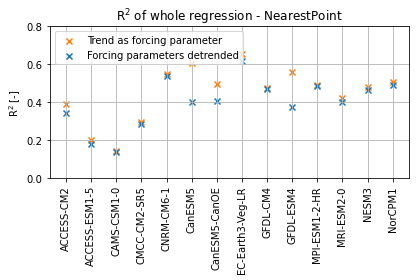

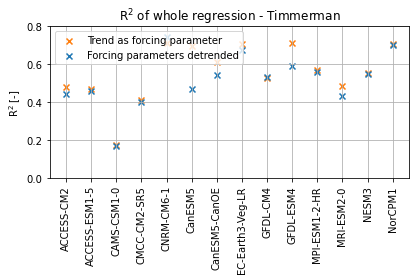

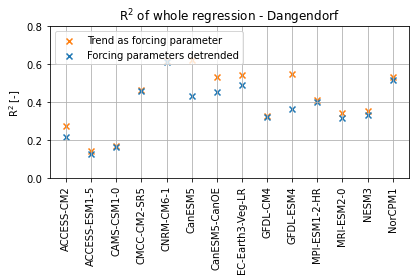

In [75]:
plot_result(results_np, results_pp_np, 'r2', 'R$^2$', 'R$^2$', 'R$^2$ of whole regression', whichmodels = 'bestmodels')
plot_result(results_tim, results_pp_tim, 'r2', 'R$^2$', 'R$^2$', 'R$^2$ of whole regression', wind_model = 'Timmerman', whichmodels = 'bestmodels')
plot_result(results_da, results_pp_da, 'r2', 'R$^2$', 'R$^2$', 'R$^2$ of whole regression', wind_model = 'Dangendorf', whichmodels = 'bestmodels')

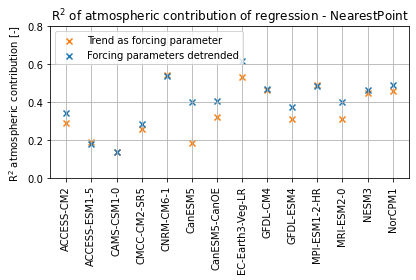

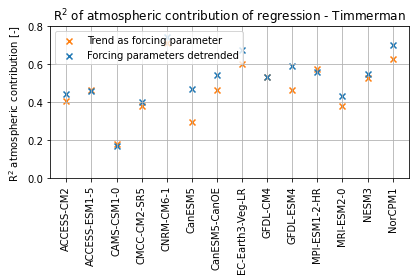

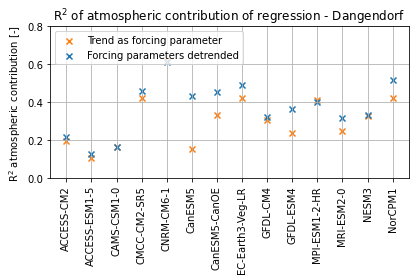

In [76]:
plot_result(results_np, results_pp_np, 'r2_wind', 'R$^2$', 'R$^2$ atmospheric contribution', 
            'R$^2$ of atmospheric contribution of regression', whichmodels = 'bestmodels')
plot_result(results_tim, results_pp_tim, 'r2_wind', 'R$^2$', 'R$^2$ atmospheric contribution', 
            'R$^2$ of atmospheric contribution of regression', wind_model = 'Timmerman', whichmodels = 'bestmodels')
plot_result(results_da, results_pp_da, 'r2_wind', 'R$^2$', 'R$^2$ atmospheric contribution', 
            'R$^2$ of atmospheric contribution of regression', wind_model = 'Dangendorf', whichmodels = 'bestmodels')

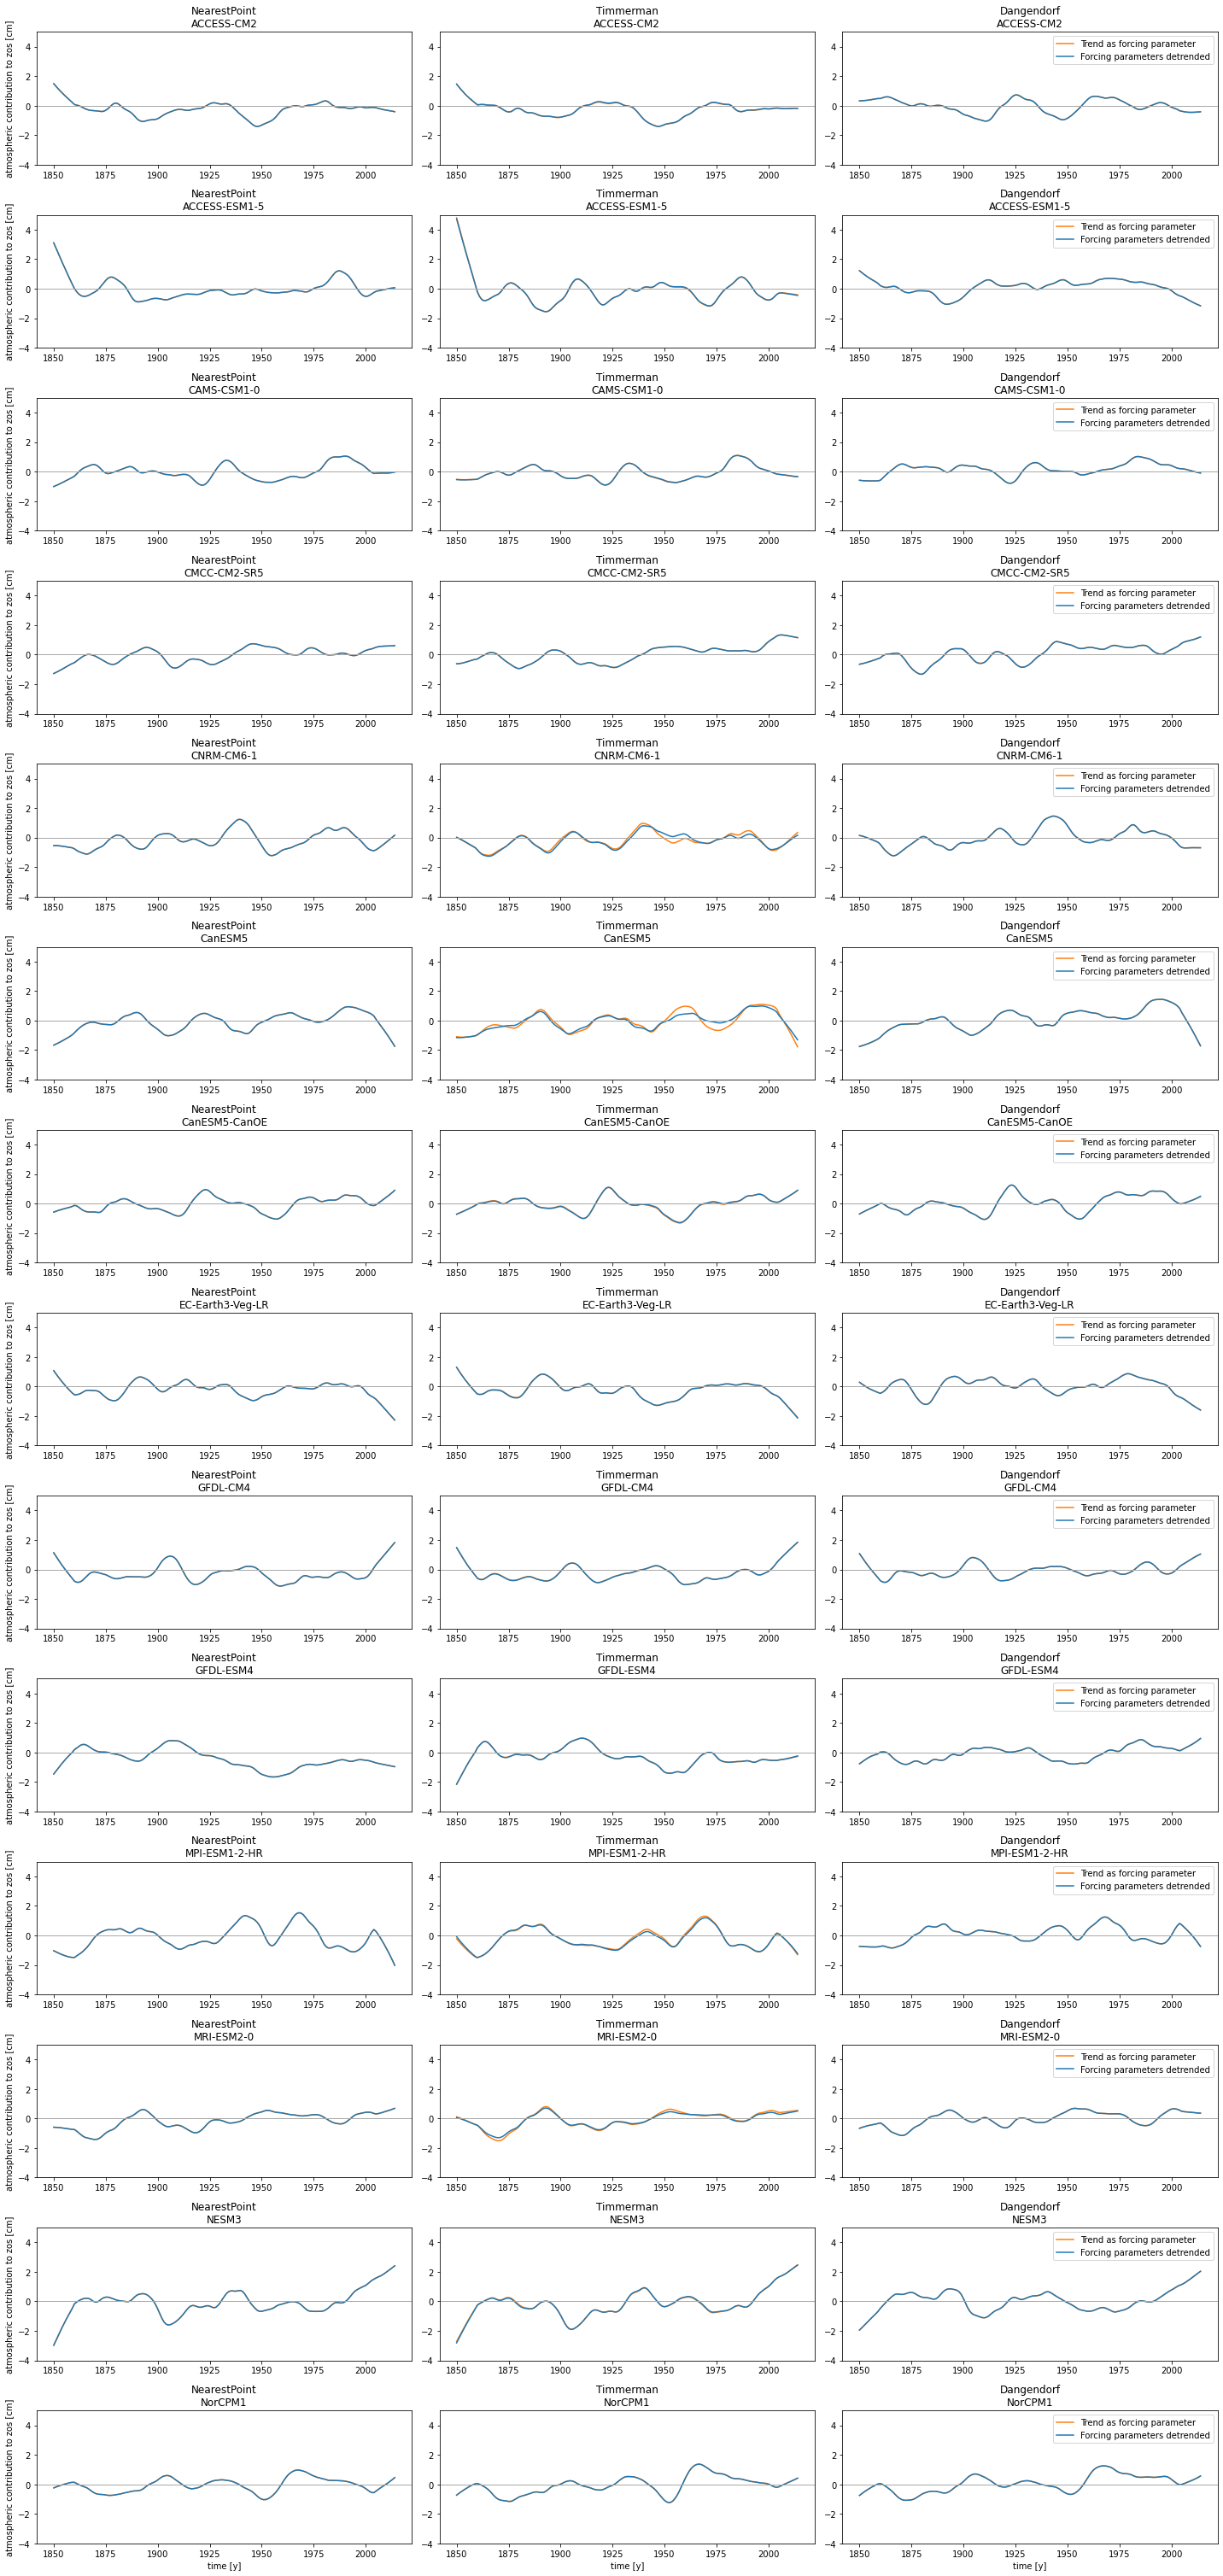

In [77]:
wind_contr = [wind_contr_hist_np, wind_contr_hist_tim, wind_contr_hist_da]
wind_contr_pp = [wind_contr_hist_pp_np, wind_contr_hist_pp_tim, wind_contr_hist_pp_da]

plot_time_series(wind_contr, wind_contr_pp, whichmodels = 'bestmodels')

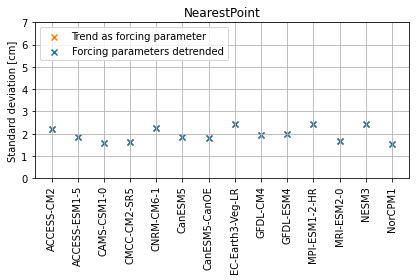

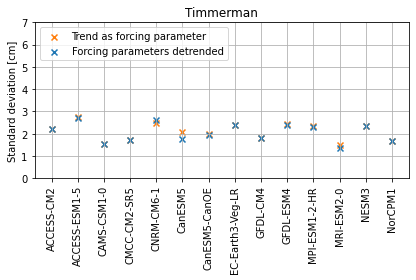

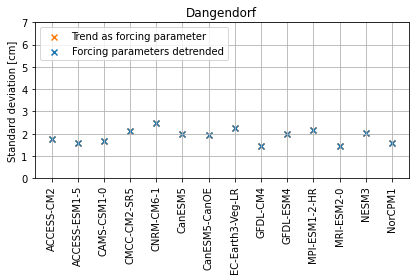

In [78]:
plot_se(wind_contr_hist_np, wind_contr_hist_pp_np, whichmodels = 'bestmodels')
plot_se(wind_contr_hist_tim, wind_contr_hist_pp_tim, wind_model = 'Timmerman', whichmodels = 'bestmodels')
plot_se(wind_contr_hist_da, wind_contr_hist_pp_da, wind_model = 'Dangendorf', whichmodels = 'bestmodels')